In [4]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm
from salishsea_tools import viz_tools
import matplotlib as mpl
import pandas as pd
import netCDF4 as nc
import shapely.geometry
from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.colors as colors

In [5]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
area = ((1-tmask) * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})[0]
volume = ((1-tmask) * mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})
max_depth = bathy.Bathymetry.rename({'y':'gridY', 'x':'gridX'})
mean_depth = np.nanmean(max_depth.to_numpy())

In [6]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
mesh_mask_depth_var='gdept_0'

thalweg_file = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)
mesh_mask_depth_var='gdept_0'
depth = mesh.variables[mesh_mask_depth_var][:]

In [7]:
# dimensions: gridY, gridX, time
vol_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2023, 2023))
vol_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2022, 2022))
vol_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2021, 2021))
vol_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020))
vol_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2019, 2019))

In [8]:
# dimensions: gridY, gridX, time
sum_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

In [9]:
this_p_var = 'fraser_river'

sum_monthly_mean = np.mean([sum_2019_mon[this_p_var], sum_2020_mon[this_p_var], sum_2021_mon[this_p_var], sum_2022_mon[this_p_var], sum_2023_mon[this_p_var]], axis=0)
sum_5year_mean = np.mean(sum_monthly_mean, axis=0)

In [10]:
volume_depsum = volume.sum(dim='depth')

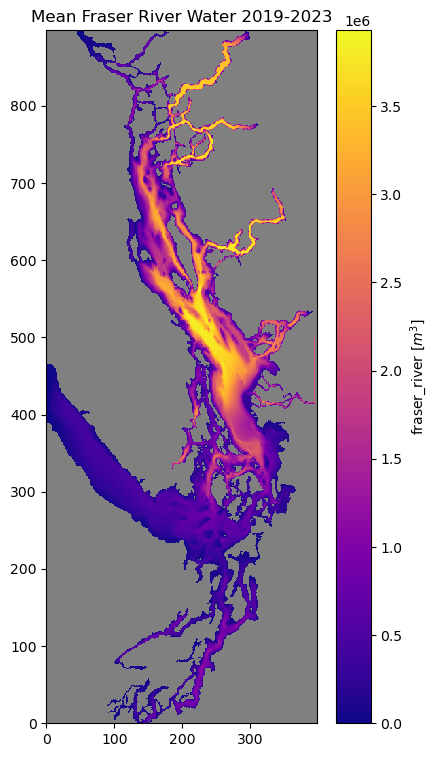

In [11]:
sum_all_mean = sum_monthly_mean.mean(axis=0)

cmap = mpl.colormaps['plasma']
fudge = 0.001
cmap.set_bad('gray')

fig, ax = plt.subplots(1,1, figsize = (5, 9), sharex=True, sharey=True)

salinity = np.ma.masked_array(sum_all_mean, mask=tmask[0])
colours = ax.pcolormesh(salinity, vmin=0, cmap=cmap)
# colours = ax[row,col].pcolormesh(salinity, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
# dtime = pd.to_datetime(sum_2019_mon['time'].values[time_idx])
ax.set_title('Mean Fraser River Water 2019-2023')
viz_tools.set_aspect(ax);

cb = fig.colorbar(colours, ax=ax, label=r'{} [$m^3$]'.format(this_p_var))

In [12]:
sum_monthly_mean.shape

(12, 898, 398)

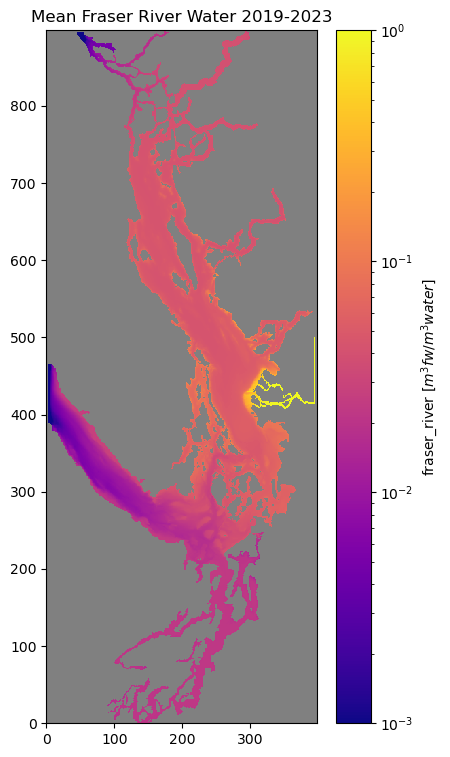

In [13]:
sum_all_mean = sum_monthly_mean.mean(axis=0)

cmap = mpl.colormaps['plasma']
fudge = 0.001
cmap.set_bad('gray')

fig, ax = plt.subplots(1,1, figsize = (5, 9), sharex=True, sharey=True)

salinity = np.ma.masked_array(sum_all_mean, mask=tmask[0])
# colours = ax.pcolormesh(salinity, vmin=0, cmap=cmap)
colours = ax.pcolormesh(salinity/volume_depsum, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
# dtime = pd.to_datetime(sum_2019_mon['time'].values[time_idx])
ax.set_title('Mean Fraser River Water 2019-2023')
viz_tools.set_aspect(ax);

cb = fig.colorbar(colours, ax=ax, label=r'{} [$m^3 fw/m^3 water$]'.format(this_p_var))

In [14]:
# allsum0_2022_mon = vol_2022_mon.isel(depth=slice(0,10)).sum(dim='depth')
# allsum1_2022_mon = vol_2022_mon.isel(depth=slice(10,20)).sum(dim='depth')
# allsum2_2022_mon = vol_2022_mon.isel(depth=slice(20,30)).sum(dim='depth')
# allsum3_2022_mon = vol_2022_mon.isel(depth=slice(30,40)).sum(dim='depth')

# allconc_2022_mon = (allsum0_2022_mon + allsum1_2022_mon + allsum2_2022_mon + allsum3_2022_mon) / volume_depsum

# allconc_2022_mon.to_netcdf('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('allconc_2022_mon'), engine="netcdf4")

In [15]:
# allsum0_2021_mon = vol_2021_mon.isel(depth=slice(0,10)).sum(dim='depth')
# allsum1_2021_mon = vol_2021_mon.isel(depth=slice(10,20)).sum(dim='depth')
# allsum2_2021_mon = vol_2021_mon.isel(depth=slice(20,30)).sum(dim='depth')
# allsum3_2021_mon = vol_2021_mon.isel(depth=slice(30,40)).sum(dim='depth')

# allconc_2021_mon = (allsum0_2021_mon + allsum1_2021_mon + allsum2_2021_mon + allsum3_2021_mon) / volume_depsum

# allconc_2021_mon.to_netcdf('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('allconc_2021_mon'), engine="netcdf4")

In [16]:
# allsum0_2020_mon = vol_2020_mon.isel(depth=slice(0,10)).sum(dim='depth')
# allsum1_2020_mon = vol_2020_mon.isel(depth=slice(10,20)).sum(dim='depth')
# allsum2_2020_mon = vol_2020_mon.isel(depth=slice(20,30)).sum(dim='depth')
# allsum3_2020_mon = vol_2020_mon.isel(depth=slice(30,40)).sum(dim='depth')

# allconc_2020_mon = (allsum0_2020_mon + allsum1_2020_mon + allsum2_2020_mon + allsum3_2020_mon) / volume_depsum

# allconc_2020_mon.to_netcdf('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('allconc_2020_mon'), engine="netcdf4")

In [17]:
# allsum0_2019_mon = vol_2019_mon.isel(depth=slice(0,10)).sum(dim='depth')
# allsum1_2019_mon = vol_2019_mon.isel(depth=slice(10,20)).sum(dim='depth')
# allsum2_2019_mon = vol_2019_mon.isel(depth=slice(20,30)).sum(dim='depth')
# allsum3_2019_mon = vol_2019_mon.isel(depth=slice(30,40)).sum(dim='depth')

# allconc_2019_mon = (allsum0_2019_mon + allsum1_2019_mon + allsum2_2019_mon + allsum3_2019_mon) / volume_depsum

# allconc_2019_mon.to_netcdf('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('allconc_2019_mon'), engine="netcdf4")

In [18]:
allconc_2019_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('allconc_2019_mon'))
allconc_2020_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('allconc_2020_mon'))
allconc_2021_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('allconc_2021_mon'))
allconc_2022_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('allconc_2022_mon'))
allconc_2023_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('allconc_2023_mon'))

In [19]:
this_p_var = 'fraser_river'
allconc_monthly_mean = np.mean([allconc_2019_mon[this_p_var], allconc_2019_mon[this_p_var], allconc_2019_mon[this_p_var], allconc_2019_mon[this_p_var], allconc_2019_mon[this_p_var]], axis=0)
allconc_all_mean = np.mean(allconc_monthly_mean, axis=0)

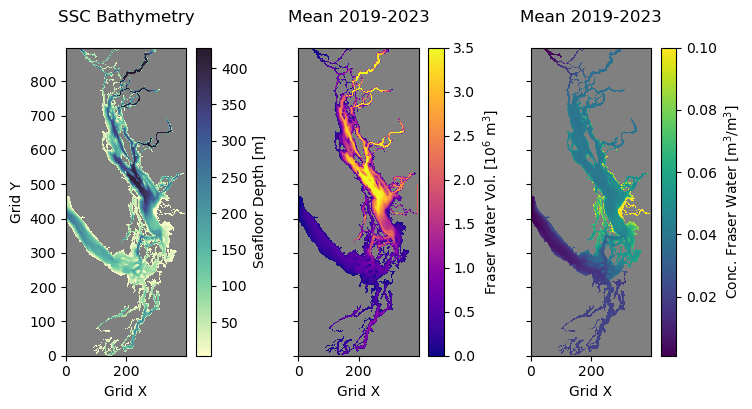

In [24]:
# allconc_all_mean = sum_all_mean/volume_depsum
cmap = mpl.colormaps['plasma']
fudge = 0.001
cmap.set_bad('gray')

fig, ax = plt.subplots(1,3, figsize = (8.5, 4), sharex=True, sharey=True)

salinity = np.ma.masked_array(sum_all_mean, mask=tmask[0])/1e6
colours = ax[1].pcolormesh(salinity, vmin=0, vmax=3.5,  cmap=cmap)
ax[1].set_title('Mean 2019-2023\n')
ax[1].set_xlabel('Grid X')
viz_tools.set_aspect(ax[1]);
cb = fig.colorbar(colours, ax=ax[1], label=r'Fraser Water Vol. [$10^6~$m$^3$]')

mycmap = cm.deep
mycmap.set_bad('grey')
colours2 = ax[0].pcolormesh(bathy['Bathymetry'], cmap=mycmap)
cb2 = fig.colorbar(colours2, ax=ax[0], label=r'Seafloor Depth [m]')
ax[0].set_title('SSC Bathymetry\n')
ax[0].set_ylabel('Grid Y')
ax[0].set_xlabel('Grid X')
viz_tools.set_aspect(ax[0]);

cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')
salinity = np.ma.masked_array(allconc_all_mean, mask=tmask[0])
# colours = ax[2].pcolormesh(salinity, norm=colors.LogNorm(vmin=0.001, vmax=0.5), cmap=cmap)
colours = ax[2].pcolormesh(salinity, vmin=0.001, vmax=0.10, cmap=cmap)
ax[2].set_title('Mean 2019-2023\n')
ax[2].set_xlabel('Grid X')
viz_tools.set_aspect(ax[2]);
cb = fig.colorbar(colours, ax=ax[2], label=r'Conc. Fraser Water [m$^3$/m$^3$]')

## Split Surface and Deep

In [18]:
# volume_surf = volume.isel(depth=slice(0,10)).sum(dim='depth')
# volume_deep = volume.isel(depth=slice(10,40)).sum(dim='depth')

In [19]:
# surfconc_2023_mon = vol_2023_mon.isel(depth=slice(0,10)).sum(dim='depth') / volume_surf

In [20]:
# deepsum1_2023_mon = vol_2023_mon.isel(depth=slice(10,20)).sum(dim='depth')
# deepsum2_2023_mon = vol_2023_mon.isel(depth=slice(20,30)).sum(dim='depth')
# deepsum3_2023_mon = vol_2023_mon.isel(depth=slice(30,40)).sum(dim='depth')

In [21]:
# deepconc_2023_mon = (deepsum1_2023_mon + deepsum2_2023_mon + deepsum3_2023_mon) / volume_deep

In [22]:
# surfconc_2023_mon.to_netcdf('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('surfconc_2023_mon'), engine="netcdf4")
# deepconc_2023_mon.to_netcdf('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('deepconc_2023_mon'), engine="netcdf4")

In [23]:
surfconc_2019_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('surfconc_2019_mon'))
deepconc_2019_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('deepconc_2019_mon'))

surfconc_2020_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('surfconc_2020_mon'))
deepconc_2020_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('deepconc_2020_mon'))

surfconc_2021_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('surfconc_2021_mon'))
deepconc_2021_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('deepconc_2021_mon'))

surfconc_2022_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('surfconc_2022_mon'))
deepconc_2022_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('deepconc_2022_mon'))

surfconc_2023_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('surfconc_2023_mon'))
deepconc_2023_mon = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/fraser_river/{}.nc'.format('deepconc_2023_mon'))

In [24]:
surfconc_2019 = surfconc_2019_mon.mean(dim='time')
deepconc_2019 = deepconc_2019_mon.mean(dim='time')

surfconc_2020 = surfconc_2020_mon.mean(dim='time')
deepconc_2020 = deepconc_2020_mon.mean(dim='time')

this_p_var = 'fraser_river'
surfconc_monthly_mean = np.mean([surfconc_2019_mon[this_p_var], surfconc_2019_mon[this_p_var], surfconc_2019_mon[this_p_var], surfconc_2019_mon[this_p_var], surfconc_2019_mon[this_p_var]], axis=0)
surfconc_all_mean = np.mean(surfconc_monthly_mean, axis=0)

deepconc_monthly_mean = np.mean([deepconc_2019_mon[this_p_var], deepconc_2019_mon[this_p_var], deepconc_2019_mon[this_p_var], deepconc_2019_mon[this_p_var], deepconc_2019_mon[this_p_var]], axis=0)
deepconc_all_mean = np.mean(deepconc_monthly_mean, axis=0)

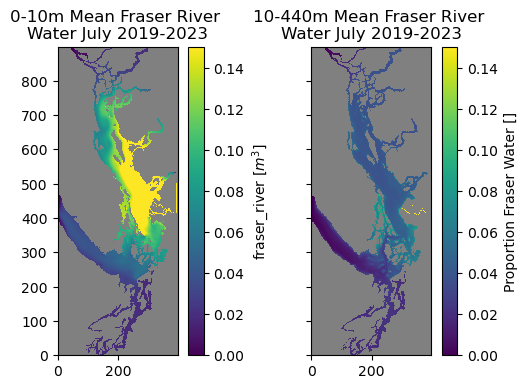

In [25]:
cmap = mpl.colormaps['viridis']
fudge = 0.001
cmap.set_bad('gray')

fig, ax = plt.subplots(1,2, figsize = (6, 4), sharex=True, sharey=True)

salinity = np.ma.masked_array(surfconc_monthly_mean[6], mask=tmask[0])
colours = ax[0].pcolormesh(salinity, vmin=0, vmax=0.15, cmap=cmap)
# colours = ax[row,col].pcolormesh(salinity, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
# dtime = pd.to_datetime(sum_2019_mon['time'].values[time_idx])
ax[0].set_title('0-10m Mean Fraser River \nWater {} 2019-2023'.format('July'))
viz_tools.set_aspect(ax[0]);
cb = fig.colorbar(colours, ax=ax[0], label=r'{} [$m^3$]'.format(this_p_var))

cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')
salinity = np.ma.masked_array(deepconc_monthly_mean[6], mask=tmask[0])
colours = ax[1].pcolormesh(salinity, vmin=0, vmax=0.15, cmap=cmap)
# colours = ax[1].pcolormesh(salinity, norm=colors.LogNorm(vmin=0.001, vmax=100), cmap=cmap)
# dtime = pd.to_datetime(sum_2019_mon['time'].values[time_idx])
ax[1].set_title('10-440m Mean Fraser River \nWater {} 2019-2023'.format('July'))
viz_tools.set_aspect(ax[1]);
cb = fig.colorbar(colours, ax=ax[1], label=r'{} []'.format('Proportion Fraser Water'))

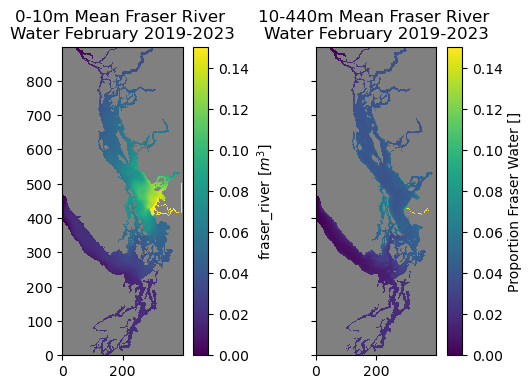

In [26]:
cmap = mpl.colormaps['viridis']
fudge = 0.001
cmap.set_bad('gray')

fig, ax = plt.subplots(1,2, figsize = (6, 4), sharex=True, sharey=True)

salinity = np.ma.masked_array(surfconc_monthly_mean[1], mask=tmask[0])
colours = ax[0].pcolormesh(salinity, vmin=0, vmax=0.15, cmap=cmap)
# colours = ax[row,col].pcolormesh(salinity, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
# dtime = pd.to_datetime(sum_2019_mon['time'].values[time_idx])
ax[0].set_title('0-10m Mean Fraser River \nWater {} 2019-2023'.format('February'))
viz_tools.set_aspect(ax[0]);
cb = fig.colorbar(colours, ax=ax[0], label=r'{} [$m^3$]'.format(this_p_var))

cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')
salinity = np.ma.masked_array(deepconc_monthly_mean[1], mask=tmask[0])
colours = ax[1].pcolormesh(salinity, vmin=0, vmax=0.15, cmap=cmap)
# colours = ax[1].pcolormesh(salinity, norm=colors.LogNorm(vmin=0.001, vmax=100), cmap=cmap)
# dtime = pd.to_datetime(sum_2019_mon['time'].values[time_idx])
ax[1].set_title('10-440m Mean Fraser River \nWater {} 2019-2023'.format('February'))
viz_tools.set_aspect(ax[1]);
cb = fig.colorbar(colours, ax=ax[1], label=r'{} []'.format('Proportion Fraser Water'))

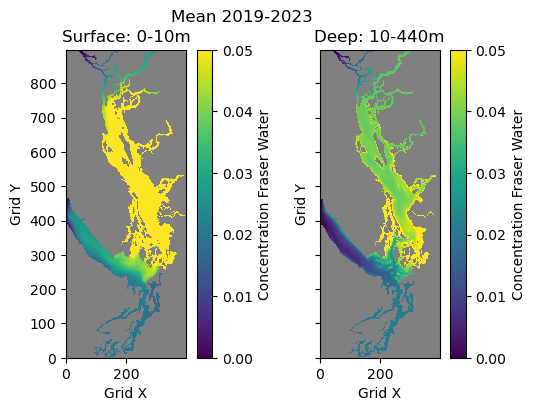

In [88]:
cmap = mpl.colormaps['viridis']
fudge = 0.001
cmap.set_bad('gray')

fig, ax = plt.subplots(1,2, figsize = (6, 4), sharex=True, sharey=True)
fig.suptitle('Mean 2019-2023')

salinity = np.ma.masked_array(surfconc_all_mean, mask=tmask[0])
colours = ax[0].pcolormesh(salinity, vmin=0, vmax=0.05, cmap=cmap)
ax[0].set_title('Surface: 0-10m'.format(''))
ax[0].set_xlabel('Grid X')
ax[0].set_ylabel('Grid Y')
viz_tools.set_aspect(ax[0]);
cb = fig.colorbar(colours, ax=ax[0], label=r'{}'.format('Concentration Fraser Water'))

cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')
salinity = np.ma.masked_array(deepconc_all_mean, mask=tmask[0])
colours = ax[1].pcolormesh(salinity, vmin=0, vmax=0.05, cmap=cmap)
ax[1].set_title('Deep: 10-440m'.format(''))
ax[1].set_xlabel('Grid X')
ax[1].set_ylabel('Grid Y')
viz_tools.set_aspect(ax[1]);
cb = fig.colorbar(colours, ax=ax[1], label=r'{}'.format('Concentration Fraser Water'))

In [28]:
print('Salish Sea {:.3f}'.format(np.nanmean(allconc_all_mean))) ## Strait of Georgia
print('SoG {:.3f}'.format(np.nanmean(allconc_all_mean[300:800, 180:398]))) ## Strait of Georgia
print('JdF {:.3f}'.format(np.nanmean(allconc_all_mean[200:500, 0:180]))) ## Juan de Fuca
print('PS {:.3f}'.format(np.nanmean(allconc_all_mean[0:200, 0:398]))) ## Puget Sound

Salish Sea 0.046
SoG 0.072
JdF 0.012
PS 0.020


In [29]:
print('Salish Sea {:.3f}'.format(np.nanmean(surfconc_all_mean))) ## Strait of Georgia
print('SoG {:.3f}'.format(np.nanmean(surfconc_all_mean[300:800, 180:398]))) ## Strait of Georgia
print('JdF {:.3f}'.format(np.nanmean(surfconc_all_mean[200:500, 0:180]))) ## Juan de Fuca
print('PS {:.3f}'.format(np.nanmean(surfconc_all_mean[0:200, 0:398]))) ## Puget Sound

Salish Sea 0.070
SoG 0.118
JdF 0.024
PS 0.019


In [30]:
print('Salish Sea {:.3f}'.format(np.nanmean(deepconc_all_mean))) ## Strait of Georgia
print('SoG {:.3f}'.format(np.nanmean(deepconc_all_mean[300:800, 180:398]))) ## Strait of Georgia
print('JdF {:.3f}'.format(np.nanmean(deepconc_all_mean[200:500, 0:180]))) ## Juan de Fuca
print('PS {:.3f}'.format(np.nanmean(deepconc_all_mean[0:200, 0:398]))) ## Puget Sound

Salish Sea 0.036
SoG 0.050
JdF 0.010
PS 0.020


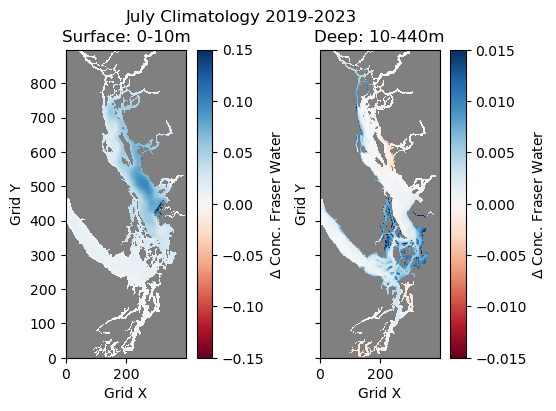

In [68]:
surfconc_diff = surfconc_monthly_mean[6] - surfconc_all_mean
deepconc_diff = deepconc_monthly_mean[6] - deepconc_all_mean
cmap = mpl.colormaps['RdBu']
fudge = 0.001
cmap.set_bad('gray')

fig, ax = plt.subplots(1,2, figsize = (6, 4), sharex=True, sharey=True)
fig.suptitle('{} Climatology 2019-2023'.format('July'))

salinity = np.ma.masked_array(surfconc_diff, mask=tmask[0])
colours = ax[0].pcolormesh(salinity, vmin=-0.15, vmax=0.15, cmap=cmap)
ax[0].set_xlabel('Grid X')
ax[0].set_ylabel('Grid Y')
ax[0].set_title('Surface: 0-10m'.format(''))
viz_tools.set_aspect(ax[0]);
cb = fig.colorbar(colours, ax=ax[0], label=r'{}'.format(r'$\Delta$ Conc. Fraser Water'))

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
salinity = np.ma.masked_array(deepconc_diff, mask=tmask[0])
colours = ax[1].pcolormesh(salinity, vmin=-0.015, vmax=0.015, cmap=cmap)
ax[1].set_xlabel('Grid X')
ax[1].set_ylabel('Grid Y')
ax[1].set_title('Deep: 10-440m'.format(''))
viz_tools.set_aspect(ax[1]);
cb = fig.colorbar(colours, ax=ax[1], label=r'{}'.format(r'$\Delta$ Conc. Fraser Water'))

In [32]:
print('Salish Sea {:.6f}'.format(np.nanmean(surfconc_diff))) ## Salish Sea
print('SoG {:.6f}'.format(np.nanmean(surfconc_diff[300:800, 180:398]))) ## Strait of Georgia
print('JdF {:.6f}'.format(np.nanmean(surfconc_diff[200:500, 0:180]))) ## Juan de Fuca
print('PS {:.6f}'.format(np.nanmean(surfconc_diff[0:200, 0:398]))) ## Puget Sound

Salish Sea 0.026869
SoG 0.045828
JdF 0.009729
PS -0.000321


In [33]:
print('Salish Sea {:.6f}'.format(np.nanmean(deepconc_diff))) ## Salish Sea
print('SoG {:.6f}'.format(np.nanmean(deepconc_diff[300:800, 180:398]))) ## Strait of Georgia
print('JdF {:.6f}'.format(np.nanmean(deepconc_diff[200:500, 0:180]))) ## Juan de Fuca
print('PS {:.6f}'.format(np.nanmean(deepconc_diff[0:200, 0:398]))) ## Puget Sound

Salish Sea 0.002282
SoG 0.002494
JdF 0.001326
PS 0.000123


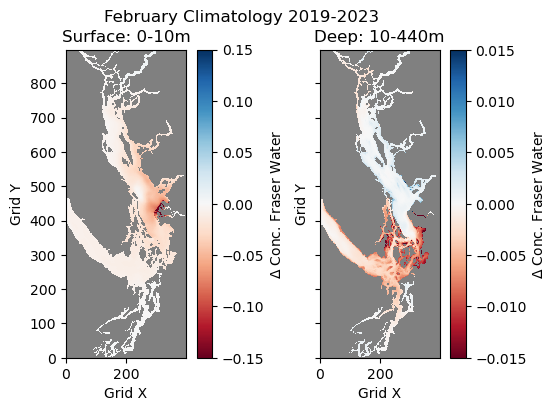

In [70]:
surfconc_diff = surfconc_monthly_mean[1] - surfconc_all_mean
deepconc_diff = deepconc_monthly_mean[1] - deepconc_all_mean
cmap = mpl.colormaps['RdBu']
fudge = 0.001
cmap.set_bad('gray')

fig, ax = plt.subplots(1,2, figsize = (6, 4), sharex=True, sharey=True)
fig.suptitle('{} Climatology 2019-2023'.format('February'))

salinity = np.ma.masked_array(surfconc_diff, mask=tmask[0])
colours = ax[0].pcolormesh(salinity, vmin=-0.15, vmax=0.15, cmap=cmap)
ax[0].set_xlabel('Grid X')
ax[0].set_ylabel('Grid Y')
ax[0].set_title('Surface: 0-10m'.format(''))
viz_tools.set_aspect(ax[0]);
cb = fig.colorbar(colours, ax=ax[0], label=r'{}'.format(r'$\Delta$ Conc. Fraser Water'))

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
salinity = np.ma.masked_array(deepconc_diff, mask=tmask[0])
colours = ax[1].pcolormesh(salinity, vmin=-0.015, vmax=0.015, cmap=cmap)
ax[1].set_xlabel('Grid X')
ax[1].set_ylabel('Grid Y')
ax[1].set_title('Deep: 10-440m'.format(''))
viz_tools.set_aspect(ax[1]);
cb = fig.colorbar(colours, ax=ax[1], label=r'{}'.format(r'$\Delta$ Conc. Fraser Water'))

In [35]:
print('Salish Sea {:.6f}'.format(np.nanmean(surfconc_diff))) ## Salish Sea
print('SoG {:.6f}'.format(np.nanmean(surfconc_diff[300:800, 180:398]))) ## Strait of Georgia
print('JdF {:.6f}'.format(np.nanmean(surfconc_diff[200:500, 0:180]))) ## Juan de Fuca
print('PS {:.6f}'.format(np.nanmean(surfconc_diff[0:200, 0:398]))) ## Puget Sound

Salish Sea -0.015456
SoG -0.027724
JdF -0.007788
PS -0.000397


In [36]:
print('Salish Sea {:.6f}'.format(np.nanmean(deepconc_diff))) ## Salish Sea
print('SoG {:.6f}'.format(np.nanmean(deepconc_diff[300:800, 180:398]))) ## Strait of Georgia
print('JdF {:.6f}'.format(np.nanmean(deepconc_diff[200:500, 0:180]))) ## Juan de Fuca
print('PS {:.6f}'.format(np.nanmean(deepconc_diff[0:200, 0:398]))) ## Puget Sound

Salish Sea -0.001703
SoG -0.001345
JdF -0.002160
PS -0.000690


# Combine the Clim plots?

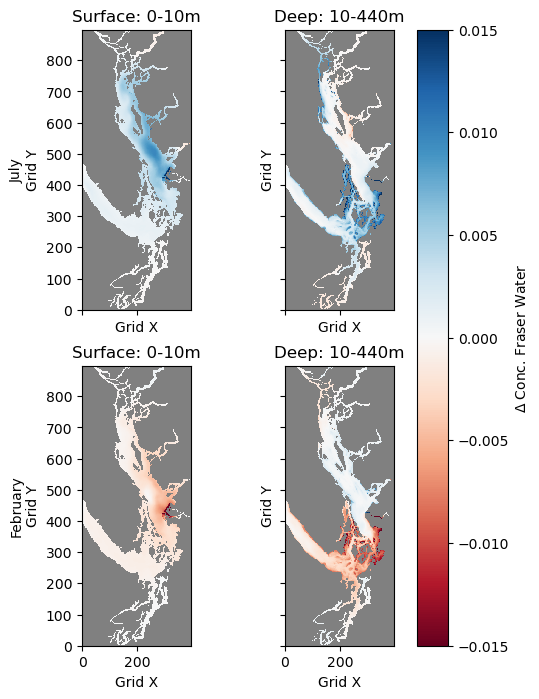

In [86]:
surfconc_diff = surfconc_monthly_mean[6] - surfconc_all_mean
deepconc_diff = deepconc_monthly_mean[6] - deepconc_all_mean
cmap = mpl.colormaps['RdBu']
fudge = 0.001
cmap.set_bad('gray')

fig, ax = plt.subplots(2,2, figsize = (6, 8), sharex=True, sharey='row')
# fig, ax = plt.subplots(1,2, figsize = (6, 4), sharex=True, sharey=True)
# fig.suptitle('{} Climatology 2019-2023'.format('July'))

salinity = np.ma.masked_array(surfconc_diff, mask=tmask[0])
colours = ax[0,0].pcolormesh(salinity, vmin=-0.15, vmax=0.15, cmap=cmap)
ax[0,0].set_xlabel('Grid X')
ax[0,0].set_ylabel('July\nGrid Y')
ax[0,0].set_title('Surface: 0-10m'.format(''))
viz_tools.set_aspect(ax[0,0]);
# cb = fig.colorbar(colours, ax=ax[0,0], label=r'{}'.format(r'$\Delta$ Conc. Fraser Water'))

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
salinity = np.ma.masked_array(deepconc_diff, mask=tmask[0])
colours = ax[0,1].pcolormesh(salinity, vmin=-0.015, vmax=0.015, cmap=cmap)
ax[0,1].set_xlabel('Grid X')
ax[0,1].set_ylabel('Grid Y')
ax[0,1].set_title('Deep: 10-440m'.format(''))
viz_tools.set_aspect(ax[0,1]);
# cb = fig.colorbar(colours, ax=ax[0,1], label=r'{}'.format(r'$\Delta$ Conc. Fraser Water'))
#########################################################################################
surfconc_diff = surfconc_monthly_mean[1] - surfconc_all_mean
deepconc_diff = deepconc_monthly_mean[1] - deepconc_all_mean
cmap = mpl.colormaps['RdBu']
fudge = 0.001
cmap.set_bad('gray')

# fig, ax = plt.subplots(1,2, figsize = (6, 4), sharex=True, sharey=True)
# fig.suptitle('{} Climatology 2019-2023'.format('February'))

salinity = np.ma.masked_array(surfconc_diff, mask=tmask[0])
colours = ax[1,0].pcolormesh(salinity, vmin=-0.15, vmax=0.15, cmap=cmap)
ax[1,0].set_xlabel('Grid X')
ax[1,0].set_ylabel('February\nGrid Y')
ax[1,0].set_title('Surface: 0-10m'.format(''))
viz_tools.set_aspect(ax[1,0]);
# cb = fig.colorbar(colours, ax=ax[1,0], label=r'{}'.format(r'$\Delta$ Conc. Fraser Water'))

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
salinity = np.ma.masked_array(deepconc_diff, mask=tmask[0])
colours = ax[1,1].pcolormesh(salinity, vmin=-0.015, vmax=0.015, cmap=cmap)
ax[1,1].set_xlabel('Grid X')
ax[1,1].set_ylabel('Grid Y')
ax[1,1].set_title('Deep: 10-440m'.format(''))
viz_tools.set_aspect(ax[1,1]);
# cb = fig.colorbar(colours, ax=ax[1,1], label=r'{}'.format(r'$\Delta$ Conc. Fraser Water'))

cb = fig.colorbar(colours, ax=ax[:], label=r'{}'.format(r'$\Delta$ Conc. Fraser Water'))
